In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
import math

In [3]:
df = pd.read_csv('processed.csv')
df

,RegionName,zri,year,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,...,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date,geoid
0,10025,2864.666667,2011,10025.0,25209.0,17965.0,1939.0,1926.0,7444.0,2328.0,...,16318.0,6319.0,83060.0,41976.0,27494.0,2108.0,2803.0,4894.0,20072011.0,NaN
1,60657,1787.250000,2011,60657.0,26905.0,10501.0,1954.0,741.0,4656.0,1466.0,...,4249.0,1012.0,62399.0,38426.0,19007.0,361.0,929.0,2692.0,20072011.0,NaN
2,10023,3074.250000,2011,10023.0,20873.0,11627.0,1939.0,881.0,3895.0,1232.0,...,4647.0,1146.0,53042.0,23235.0,21578.0,680.0,1923.0,3844.0,20072011.0,NaN
3,77494,1584.500000,2011,77494.0,2245.0,15195.0,2004.0,30.0,510.0,161.0,...,5804.0,1183.0,39416.0,7399.0,28275.0,184.0,920.0,2015.0,20072011.0,NaN
4,60614,1897.583333,2011,60614.0,22176.0,11237.0,1961.0,856.0,3696.0,1016.0,...,2941.0,711.0,58574.0,33137.0,20412.0,460.0,1103.0,2835.0,20072011.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75793,83287,1005.333333,2016,83287.0,9.0,86.0,2000.0,3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20122016.0,NaN
75794,92341,1308.666667,2016,92341.0,89.0,44.0,1964.0,9.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20122016.0,NaN
75795,26291,1021.583333,2016,26291.0,0.0,29.0,2002.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20122016.0,NaN
75796,12720,1196.500000,2016,12720.0,70.0,38.0,1986.0,14.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20122016.0,NaN


In [4]:
df[['total_pop','male_pop','female_pop','white_pop','black_pop','asian_pop','hispanic_pop','amerindian_pop','other_race_pop','zri']].corr().style.background_gradient(cmap='coolwarm').set_precision(2) 
# processing.corr().style.background_gradient(cmap='coolwarm').set_precision(2) 

,total_pop,male_pop,female_pop,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,zri
total_pop,1,1,1,0.69,0.45,0.5,0.65,0.15,0.28,0.18
male_pop,1,1,0.99,0.69,0.42,0.5,0.66,0.15,0.28,0.18
female_pop,1,0.99,1,0.69,0.47,0.49,0.64,0.14,0.29,0.18
white_pop,0.69,0.69,0.69,1,0.0079,0.21,0.068,0.12,0.12,0.089
black_pop,0.45,0.42,0.47,0.0079,1,0.075,0.17,0.0058,0.19,-0.069
asian_pop,0.5,0.5,0.49,0.21,0.075,1,0.29,0.028,0.22,0.37
hispanic_pop,0.65,0.66,0.64,0.068,0.17,0.29,1,0.087,0.18,0.15
amerindian_pop,0.15,0.15,0.14,0.12,0.0058,0.028,0.087,1,0.024,-0.071
other_race_pop,0.28,0.28,0.29,0.12,0.19,0.22,0.18,0.024,1,0.11
zri,0.18,0.18,0.18,0.089,-0.069,0.37,0.15,-0.071,0.11,1


In [5]:
df['logzri'] = np.log(df['zri'])

### population vs. zri

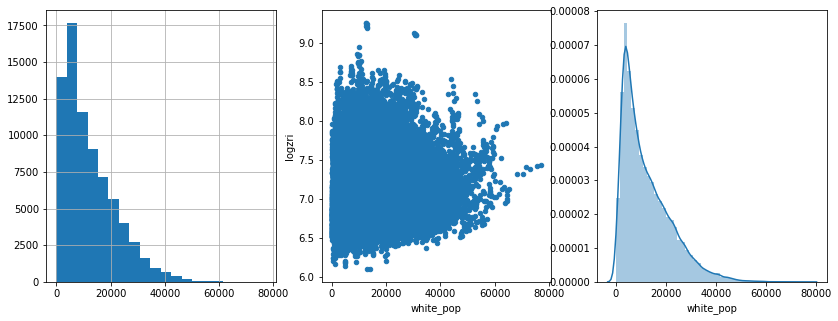

In [6]:
df['white_pop'].isnull().sum()
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

df['white_pop'].hist(bins=20, ax=ax1)
df.plot.scatter(x='white_pop', y='logzri', ax=ax2)
sns.distplot(df['white_pop'], ax=ax3)

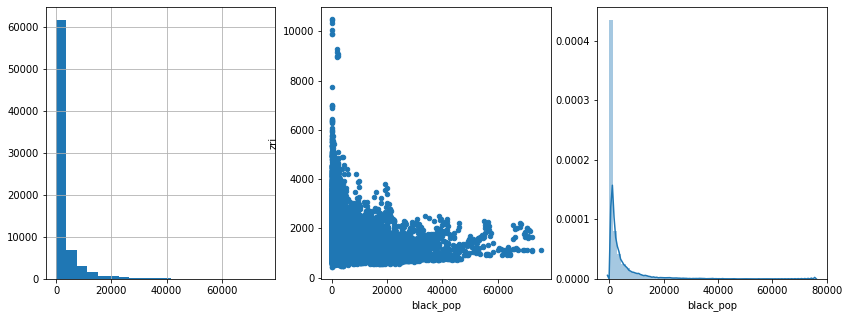

In [7]:
df['black_pop'].isnull().sum()
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

df['black_pop'].hist(bins=20, ax=ax1)
df.plot.scatter(x='black_pop', y='zri', ax=ax2)
sns.distplot(df['black_pop'], ax=ax3)

11


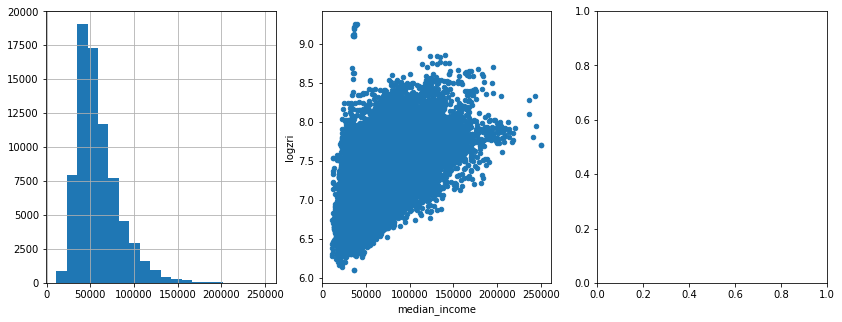

In [8]:
print(df['median_income'].isnull().sum())
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

df['median_income'].hist(bins=20, ax=ax1)
df.plot.scatter(x='median_income', y='logzri', ax=ax2)
# sns.distplot(df['median_income'], ax=ax3)

In [9]:
df.isnull().sum().sort_values(ascending=False).head(40)/len(df)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

geoid                                                          1.000000
pop_divorced                                                   0.333333
pop_widowed                                                    0.333333
pop_separated                                                  0.333333
pop_now_married                                                0.333333
pop_never_married                                              0.333333
pop_15_and_over                                                0.333333
one_year_more_college                                          0.166667
pop_5_years_over                                               0.166667
pop_25_years_over                                              0.166667
high_school_diploma                                            0.166667
bachelors_degree                                               0.166667
speak_spanish_at_home                                          0.166667
speak_only_english_at_home                                     0

In [10]:
df = df.drop(['geoid','pop_divorced','pop_widowed','pop_separated','pop_now_married','pop_15_and_over',
         'one_year_more_college','pop_5_years_over','pop_25_years_over','high_school_diploma','bachelors_degree',
        'speak_spanish_at_home','speak_only_english_at_home','masters_degree','speak_spanish_at_home_low_english',
        'associates_degree','less_one_year_college','pop_never_married'], axis=1)

In [11]:
df.isnull().sum().sort_values(ascending=False).head(40)/len(df)

aggregate_travel_time_to_work                                  0.059883
median_rent                                                    0.004050
renter_occupied_housing_units_paying_cash_median_gross_rent    0.003734
percent_income_spent_on_rent                                   0.002889
median_year_structure_built                                    0.000778
owner_occupied_housing_units_lower_value_quartile              0.000567
owner_occupied_housing_units_median_value                      0.000172
owner_occupied_housing_units_upper_value_quartile              0.000158
median_income                                                  0.000145
income_per_capita                                              0.000079
gini_index                                                     0.000079
median_age                                                     0.000053
housing_units_renter_occupied                                  0.000000
dwellings_20_to_49_units                                       0

In [12]:
#impute missingness
# num_cols = ['aggregate_travel_time_to_work','median_rent','renter_occupied_housing_units_paying_cash_median_gross_rent',
#            'percent_income_spent_on_rent','median_year_structure_built','owner_occupied_housing_units_lower_value_quartile',
#            'owner_occupied_housing_units_median_value','owner_occupied_housing_units_upper_value_quartile','median_income',
#            'income_per_capita','gini_index','median_age']

missing_impute = SimpleImputer(strategy='median')
missing_impute = missing_impute.fit(df)

df = pd.DataFrame(missing_impute.transform(df),columns=df.columns)

In [13]:
df

,RegionName,zri,year,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,...,walked_to_work,worked_at_home,workers_16_and_over,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,do_date,logzri
0,10025.0,2864.666667,2011.0,10025.0,25209.0,17965.0,1939.0,1926.0,7444.0,2328.0,...,6064.0,4323.0,47107.0,5408.0,3664.0,2268.0,42784.0,20051.0,20072011.0,7.960207
1,60657.0,1787.250000,2011.0,60657.0,26905.0,10501.0,1954.0,741.0,4656.0,1466.0,...,2695.0,3445.0,48647.0,6786.0,5350.0,2024.0,45202.0,5144.0,20072011.0,7.488433
2,10023.0,3074.250000,2011.0,10023.0,20873.0,11627.0,1939.0,881.0,3895.0,1232.0,...,6073.0,2965.0,34099.0,2849.0,2231.0,1508.0,31134.0,5449.0,20072011.0,8.030816
3,77494.0,1584.500000,2011.0,77494.0,2245.0,15195.0,2004.0,30.0,510.0,161.0,...,88.0,1420.0,24937.0,2612.0,3448.0,1544.0,23517.0,7852.0,20072011.0,7.368024
4,60614.0,1897.583333,2011.0,60614.0,22176.0,11237.0,1961.0,856.0,3696.0,1016.0,...,2702.0,2823.0,42229.0,3841.0,3813.0,2232.0,39406.0,3944.0,20072011.0,7.548336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75793,83287.0,1005.333333,2016.0,83287.0,9.0,86.0,2000.0,3.0,0.0,0.0,...,0.0,0.0,42.0,0.0,0.0,10.0,42.0,9.0,20122016.0,6.913074
75794,92341.0,1308.666667,2016.0,92341.0,89.0,44.0,1964.0,9.0,11.0,0.0,...,0.0,22.0,70.0,0.0,16.0,32.0,48.0,0.0,20122016.0,7.176764
75795,26291.0,1021.583333,2016.0,26291.0,0.0,29.0,2002.0,0.0,0.0,0.0,...,0.0,0.0,45.0,0.0,0.0,0.0,45.0,0.0,20122016.0,6.929109
75796,12720.0,1196.500000,2016.0,12720.0,70.0,38.0,1986.0,14.0,0.0,0.0,...,0.0,0.0,152.0,0.0,45.0,0.0,152.0,76.0,20122016.0,7.087156


In [ ]:
#transform 


In [14]:
#standardization
X_train = df.drop(['geo_id','zri','logzri','do_date'],axis=1)
y_train = df[['logzri']]

num_scaler = StandardScaler()
num_scaler = num_scaler.fit(X_train)
X_train = pd.DataFrame(num_scaler.transform(X_train),columns=X_train.columns)

In [15]:
X_train

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,...,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race
0,-1.310776,-1.46385,9.614040,3.380676,-2.317756,9.237061,7.356767,7.017954,7.377971,8.689430,...,3.008689,1.786823,11.048123,9.352823,4.961602,7.366341,2.703425,1.231232,4.637669,2.048175
1,0.417586,-1.46385,10.334684,1.432169,-1.338865,2.946716,4.314004,4.113344,4.874712,4.940072,...,4.570594,0.839577,4.650440,7.258364,5.164152,9.473175,4.272367,0.972501,4.969414,0.172137
2,-1.310844,-1.46385,7.771640,1.726115,-2.317756,3.689879,3.483465,3.324853,3.821198,5.905392,...,1.689010,0.304535,11.065214,6.113329,3.250718,3.453868,1.369917,0.425346,3.039314,0.210521
3,0.992330,-1.46385,-0.143545,2.657556,1.924104,-0.827491,-0.210851,-0.284007,-0.215716,-0.390172,...,1.493520,1.156486,-0.300216,2.427748,2.045682,3.091517,2.502421,0.463520,1.994278,0.512937
4,0.416118,-1.46385,8.325295,1.624304,-0.882050,3.557171,3.266281,2.597016,2.474006,2.887019,...,3.936887,0.256096,4.663733,5.774589,4.320021,4.970544,2.842080,1.193059,4.174215,0.021118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75793,1.190079,1.46385,-1.093639,-1.286709,1.663067,-0.970815,-0.767454,-0.826515,-0.826380,-0.834359,...,-1.184032,-1.224925,-0.467327,-0.959646,-1.228646,-0.901989,-0.706187,-1.163098,-1.226442,-0.474100
75794,1.499144,1.46385,-1.059647,-1.297674,-0.686271,-0.938965,-0.755449,-0.826515,-0.826380,-0.834359,...,-1.186545,-1.236006,-0.467327,-0.907166,-1.224964,-0.901989,-0.691298,-1.139770,-1.225619,-0.475233
75795,-0.755524,1.46385,-1.097463,-1.301590,1.793586,-0.986740,-0.767454,-0.826515,-0.826380,-0.834359,...,-1.179007,-1.247720,-0.467327,-0.959646,-1.228252,-0.901989,-0.706187,-1.173702,-1.226030,-0.475233
75796,-1.218780,1.46385,-1.067720,-1.299240,0.749435,-0.912424,-0.767454,-0.826515,-0.826380,-0.834359,...,-1.186545,-1.233473,-0.467327,-0.959646,-1.214179,-0.901989,-0.664311,-1.173702,-1.211350,-0.465668


In [16]:
#multiple linear model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
rss = np.sum((y_train-lm.predict(X_train))**2)
rss
math.sqrt(rss/X_train.shape[0]) #RSE

0.14807116313961355

In [19]:
test = pd.read_csv('model_test.csv')
test.isnull().sum().sort_values(ascending=False).head(40)/len(test)
test = test.drop(['pop_divorced','pop_widowed','pop_separated','pop_now_married','pop_15_and_over',
         'one_year_more_college','pop_5_years_over','pop_25_years_over','high_school_diploma','bachelors_degree',
        'speak_spanish_at_home','speak_only_english_at_home','masters_degree','speak_spanish_at_home_low_english',
        'associates_degree','less_one_year_college','pop_never_married'], axis=1)

In [20]:
test['logzri'] = np.log(test['zri'])
X_test = test.drop(['geo_id','zri','logzri','do_date'],axis=1)
y_test = test[['logzri']]

In [33]:
test.isnull().sum().sort_values(ascending=False).head(40)/len(test)
# impute missingness
missing_impute = SimpleImputer(strategy='median')
missing_impute = missing_impute.fit(X_test)

X_test = pd.DataFrame(missing_impute.transform(X_test),columns=X_test.columns)

#standardization
num_scaler = StandardScaler()
num_scaler = num_scaler.fit(X_test)
X_test = pd.DataFrame(num_scaler.transform(X_test),columns=X_test.columns)

In [34]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
# lasso
lasso = Lasso()

alpha = 10**np.linspace(-8,0,50)
params = {'alpha': alpha}
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=params)
grid_search_lasso.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-08, 1.45634848e-08, 2.12095089e-08, 3.08884360e-08,...
       1.67683294e-03, 2.44205309e-03, 3.55648031e-03, 5.17947468e-03,
       7.54312006e-03, 1.09854114e-02, 1.59985872e-02, 2.32995181e-02,
       3.39322177e-02, 4.94171336e-02, 7.19685673e-02, 1.04811313e-01,
       1.52641797e-01, 2.22299648e-01, 3.23745754e-01, 4.71486636e-01,
       6.86648845e-01, 1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
grid_search_lasso.best_params_

{'alpha': 0.00017575106248547893}

In [40]:
print (grid_search_lasso.score(X_train, y_train))
grid_search_lasso.score(X_test, y_test)

0.8146868751031576


0.7760229766100304

In [55]:
grid_lasso = grid_search_lasso.best_estimator_
grid_lasso

Lasso(alpha=0.00017575106248547893, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
from sklearn.inspection import permutation_importance

ImportError: cannot import name 'permutation_importance' from 'sklearn.inspection' (C:\Users\BGCNHK\Anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

In [50]:
import sklearn
print('sklearn version %s'%(sklearn.__version__))

sklearn version 0.21.3


In [59]:
# feature importance
coeff = pd.DataFrame({"feature":X_train.columns,"coeff":grid_lasso.coef_})
coeff = coeff.sort_values(by = 'coeff', ascending = False)

print("Lasso picked " + str(sum(coeff.coeff != 0)) + " variables and eliminated the other " +  
      str(sum(coeff.coeff == 0)) + " variables")

print(coeff[coeff.coeff!=0].head(10))
coeff[coeff.coeff!=0].tail(10)

Lasso picked 166 variables and eliminated the other 69 variables
                                               feature     coeff
35                                         median_rent  0.132317
75   owner_occupied_housing_units_upper_value_quartile  0.077157
73   owner_occupied_housing_units_lower_value_quartile  0.071844
29                                       median_income  0.043748
210                                            no_cars  0.038947
68                                income_100000_124999  0.032221
67                                  income_75000_99999  0.026134
70                                income_150000_199999  0.024741
69                                income_125000_149999  0.024477
216                                occupation_services  0.021422


,feature,coeff
187,four_more_cars,-0.021207
146,households_retirement_income,-0.025235
56,income_less_10000,-0.026368
169,commuters_by_subway_or_elevated,-0.027217
177,employed_finance_insurance_real_estate,-0.028556
192,households_public_asst_or_food_stamps,-0.028971
217,one_car,-0.031030
209,no_car,-0.031161
72,renter_occupied_housing_units_paying_cash_medi...,-0.031837
76,married_households,-0.090571


In [62]:
X_train1 = X_train[['median_rent', 'owner_occupied_housing_units_upper_value_quartile','owner_occupied_housing_units_lower_value_quartile',
       'median_income','no_cars', 'occupation_services','four_more_cars','households_retirement_income','income_less_10000',
       'commuters_by_subway_or_elevated','households_public_asst_or_food_stamps','renter_occupied_housing_units_paying_cash_median_gross_rent']]

In [64]:
#multiple linear model
lm = LinearRegression()
lm.fit(X_train1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
rss = np.sum((y_train-lm.predict(X_train1))**2)
rss
math.sqrt(rss/X_train.shape[0]) #RSE

0.1668988926215784

In [69]:
lm.score(X_train1, y_train)

0.7665928419348014

In [70]:
X_test1 = X_test[['median_rent', 'owner_occupied_housing_units_upper_value_quartile','owner_occupied_housing_units_lower_value_quartile',
       'median_income','no_cars', 'occupation_services','four_more_cars','households_retirement_income','income_less_10000',
       'commuters_by_subway_or_elevated','households_public_asst_or_food_stamps','renter_occupied_housing_units_paying_cash_median_gross_rent']]

In [71]:
rss = np.sum((y_test-lm.predict(X_test1))**2)
rss
math.sqrt(rss/X_train.shape[0]) #RSE

0.07688338398531437